In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

%matplotlib inline

# converting column to datetime with read_csv
aapl = pd.read_csv("data/aapl.csv",parse_dates=['Date'])
# we can also conver values to datetime with to_datetime
#aapl['Date'] = pd.to_datetime(aapl.Date)
aapl.head(3)

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593


In [3]:
aapl.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### extracting time elements

Pandas' `datetime` columns have a `.dt` attribute that allows you to access values that are specific to dates. For example:

    aapl.Date.dt.day
    aapl.Date.dt.month
    aapl.Date.dt.year
    aapl.Date.dt.weekday_name

In [4]:
print (aapl.head())
aapl.Date.dt.day.head()

        Date    Open    High     Low   Close    Volume
0 2017-01-13  119.11  119.62  118.81  119.04  26111948
1 2017-01-12  118.90  119.30  118.21  119.25  27086220
2 2017-01-11  118.74  119.93  118.60  119.75  27588593
3 2017-01-10  118.77  119.38  118.30  119.11  24462051
4 2017-01-09  117.95  119.43  117.94  118.99  33561948


0    13
1    12
2    11
3    10
4     9
Name: Date, dtype: int64

In [5]:
# we can likewise use dates for filtering
print(aapl.shape)
aapl[aapl.Date>'1/1/2017'].shape

(251, 6)


(9, 6)

## Setting a datetime index

In [6]:
# Import the data.
df = pd.read_csv('data/mapquest_google_trends.csv',names=['WeekOf', 'Hits'],parse_dates=['WeekOf'],skiprows=1)
df.set_index('WeekOf',inplace=True)
df.head()

,Hits
WeekOf,
2004-01-04,53
2004-01-11,53
2004-01-18,54
2004-01-25,53
2004-02-01,52


### What does the pattern in the chart below display?

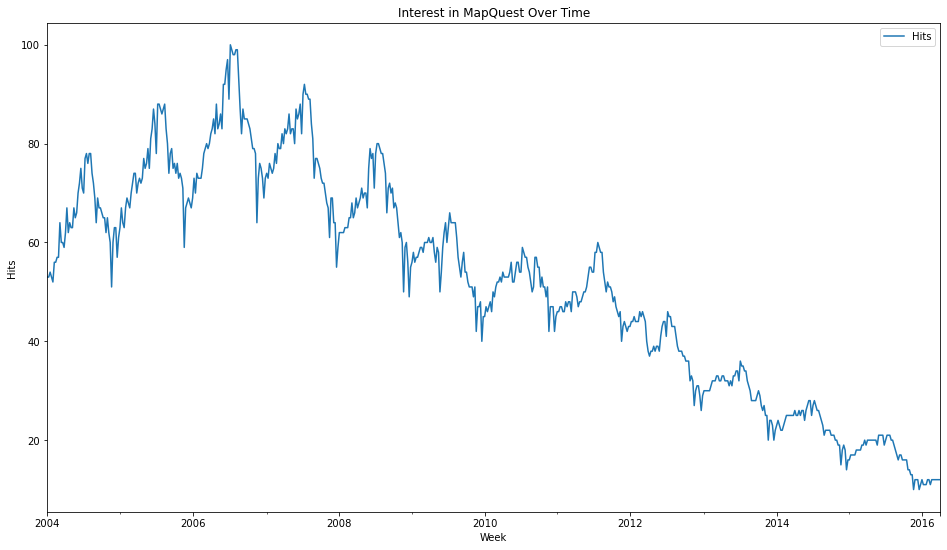

In [7]:
# Clean/organize the data. 
plt.rcParams["figure.figsize"] = [16,9]
ax = df.plot(title = "Interest in MapQuest Over Time")
ax.set_xlabel("Week")
ax.set_ylabel("Hits")
plt.show()

### Rolling Statistics

* In the example below, each data point is the average of 5 periods, centered on the date. In other words, the 2 periods before, the date, and the 2 periods after
* why bother doing this?

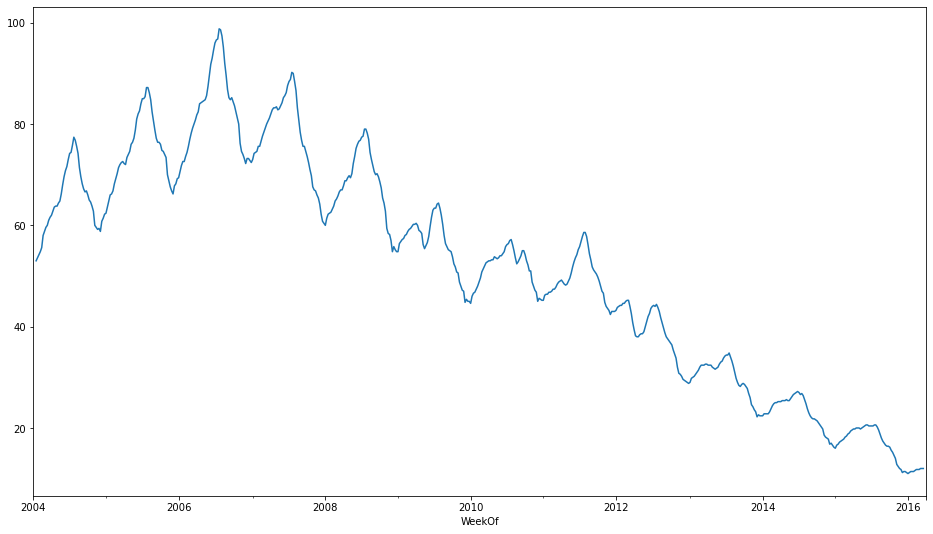

In [8]:
df.Hits.rolling(window=5, center=True).mean().plot();

### Aggregating Time Series with Resample

When we have a datetime index , we can use `data.resample` to aggregate column values. We pass in:
    - A parameter for the level on which to roll up to: `'D'` for day, `'W'` for week, `'M'` for month, `'A'` for year.
    - The aggregation method to perform: `mean()`, `median()`, `sum()`, etc.

In [10]:
# what calculation did we just do?
# what is resample like?
df[['Hits']].resample('A').median().head()

,Hits
WeekOf,
2004-12-31,64.0
2005-12-31,74.0
2006-12-31,82.0
2007-12-31,78.5
2008-12-31,67.5


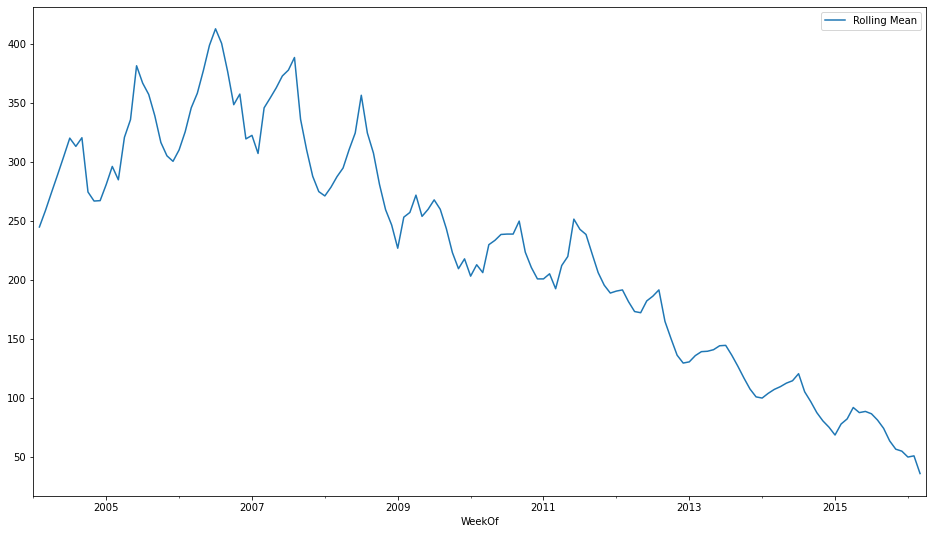

In [11]:
# rolling average of the monthly sum of hits
rolling_mean = df.Hits.resample('M').sum().rolling(window=3, center=True).mean()
plt.rcParams["figure.figsize"] = [16,9]
ax = rolling_mean.plot(legend = True)
ax.legend(['Rolling Mean'])
plt.show()

### Plotting With Dates

In [12]:
# multiple columns in a dataframe
mean_and_median = df.Hits.resample('M').sum().rolling(window=3, center=True).agg(['mean','median'])
mean_and_median.tail()

,mean,median
WeekOf,,
2015-12-31,54.666667,57.0
2016-01-31,49.666667,47.0
2016-02-29,50.666667,48.0
2016-03-31,35.666667,47.0
2016-04-30,NaN,NaN


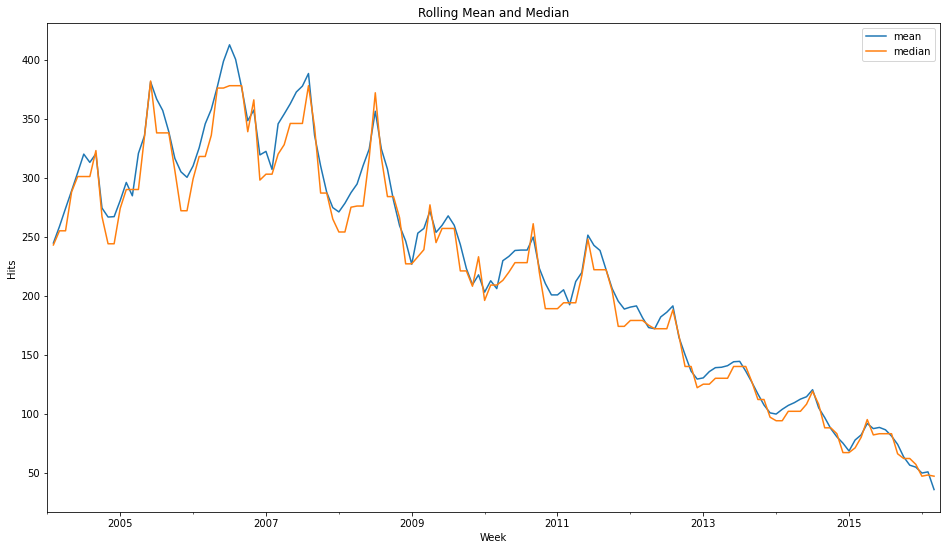

In [13]:
ax = mean_and_median.plot(legend = True,title='Rolling Mean and Median')
ax.set_xlabel("Week")
ax.set_ylabel("Hits")
plt.show()

In [46]:
# separate dataframes - assigning the ax of the first plot to subsequent plot calls
rolling_median = df.Hits.resample('M').sum().rolling(window=3, center=True).median()
rolling_median.tail()

WeekOf
2015-12-31    57.0
2016-01-31    47.0
2016-02-29    48.0
2016-03-31    47.0
2016-04-30     NaN
Freq: M, Name: Hits, dtype: float64

In [15]:
rolling_mean.tail(2)

WeekOf
2016-03-31    35.666667
2016-04-30          NaN
Freq: M, Name: Hits, dtype: float64

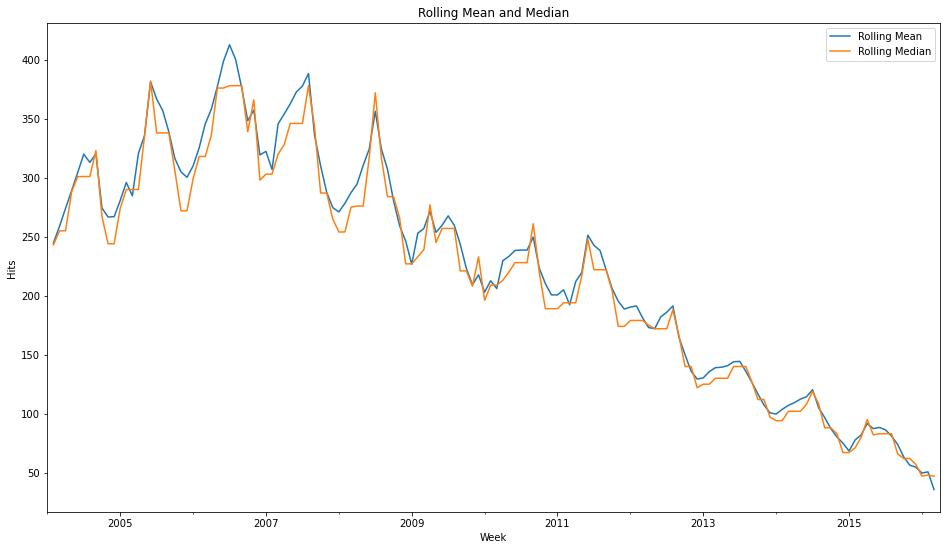

In [47]:
# separate dataframes - assigning the ax of the first plot to subsequent plot calls
ax = rolling_mean.plot(title = "Rolling Mean and Median")
rolling_median.plot(ax=ax)
ax.set_xlabel("Week")
ax.set_ylabel("Hits")
# create a legend to represent column names - there isn't one with a pandas series
ax.legend(['Rolling Mean','Rolling Median'])
plt.show()

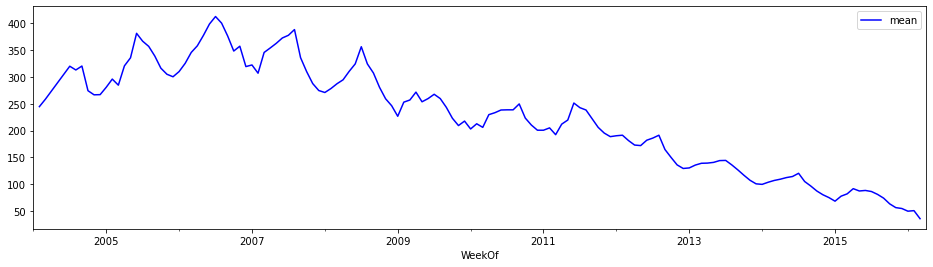

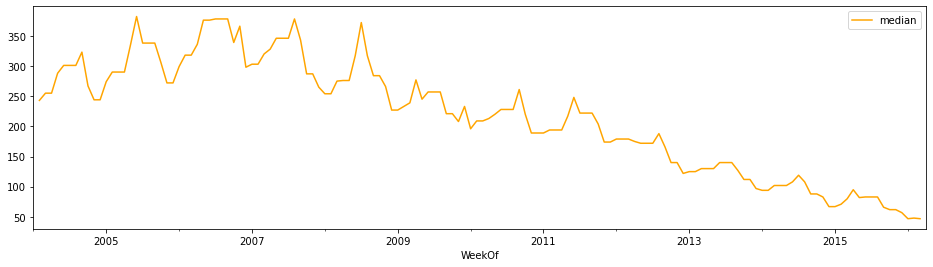

In [17]:
# subplots

mean_and_median[['mean']].plot(subplots=True, layout=(2,1),color='blue')

#plt.subplot(1, 2, 2)
mean_and_median[['median']].plot(subplots=True, layout=(2,1), color='orange')

plt.show()

### Groupwork

**read in the covidtracking data**

In [18]:
import requests
response = requests.get("https://covidtracking.com/api/states/daily")
json_data = response.json()
covid_df = pd.DataFrame(json_data)
covid_df = covid_df.sort_values('positiveIncrease',ascending=False).drop_duplicates(subset=['state','date'])
covid_df['date'] = covid_df['date'].map(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])
covid_df['date']=pd.to_datetime(covid_df['date'])
covid_df.head(1)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
7103,2020-11-01,TX,972330.0,67475.0,NaN,NaN,totalTestsViral,8517903.0,5691.0,NaN,...,None,53,0,aa00f6ceb2b81d730f907a8cabed225a753a20ce,0,0,0,0,0,


**calculate the weekly average of death increases in Massachusetts - use the deathIncrease columnn- and assign the result to a variable**

In [25]:
covid_df.set_index("date", inplace=True)


In [39]:

mass_only = covid_df[covid_df.state=="MA"]
mass_only

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,MA,384181.0,16194.0,3679369.0,NaN,totalTestsViral,11046093.0,2280.0,16098.0,412.0,...,None,79,0,1c7be384a4461045f62532307ddf38fcb4752bf0,0,0,0,0,0,
2021-01-08,MA,419721.0,18898.0,3762340.0,NaN,totalTestsViral,11525766.0,2311.0,16603.0,440.0,...,None,76,0,b1a1ea0b08669b797837130523f707ec826b3996,0,0,0,0,0,
2020-12-26,MA,349602.0,13871.0,3595082.0,NaN,totalTestsViral,10622490.0,2077.0,15905.0,416.0,...,None,47,0,e089dc9e9e76dcebf13355e4789098c4184fae22,0,0,0,0,0,
2021-01-07,MA,411601.0,18413.0,3743466.0,NaN,totalTestsViral,11417197.0,2386.0,16603.0,455.0,...,None,73,505,d4a001269c058a6c69f143ee190bbd00637e73de,0,0,0,0,0,
2021-01-09,MA,427135.0,19202.0,3780520.0,NaN,totalTestsViral,11635559.0,2291.0,16603.0,445.0,...,None,89,0,3e58109d085a06f8640f62b61be9a90f04ba9142,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,MA,341925.0,13618.0,3572264.0,NaN,totalTestsViral,10514045.0,2095.0,15905.0,409.0,...,None,0,0,e3a3b58c17a25c496afe46093ed6a947240a09cb,0,0,0,0,0,
2020-04-20,MA,38077.0,NaN,124164.0,NaN,totalTestsViral,220251.0,3872.0,3872.0,987.0,...,None,157,83,c8230b6ae243b3f9025c39a3cd2390663de257be,0,0,0,0,0,
2020-04-24,MA,46023.0,NaN,149053.0,NaN,totalTestsViral,275799.0,3847.0,4752.0,1034.0,...,None,108,259,80510fbb9c88681ec41c1cac8bb144387458cc38,0,0,0,0,0,


In [58]:
average_covid_death = mass_only["deathIncrease"].resample("W").mean()
average_covid_death.head()


date
2020-01-26    0.0
2020-02-02    0.0
2020-02-09    0.0
2020-02-16    0.0
2020-02-23    0.0
Freq: W-SUN, Name: deathIncrease, dtype: float64

In [60]:
covid_df.shape

(20780, 55)

**plot the weekly average - don't forget to label your axes and provide a title**

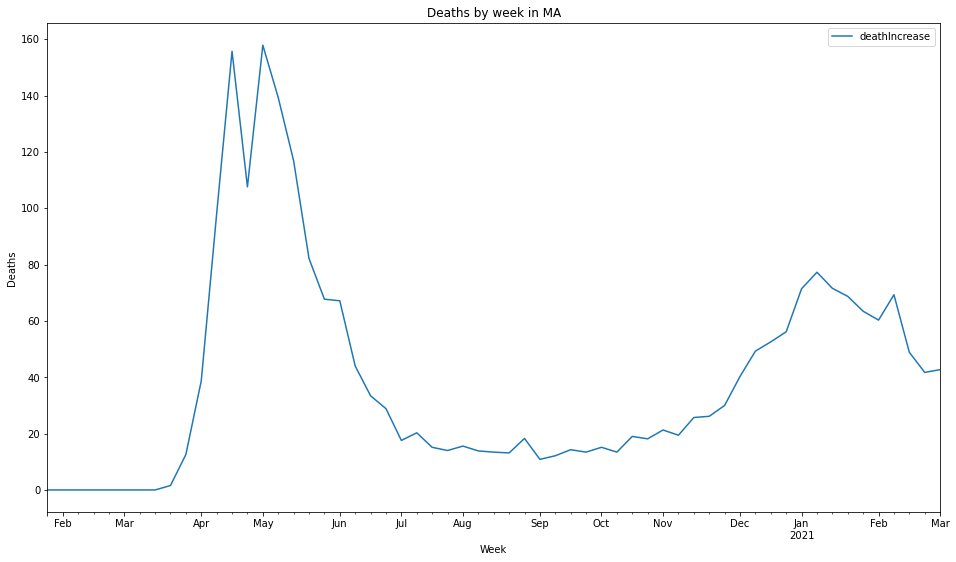

In [59]:
ax = average_covid_death.plot(legend = True, title='Deaths by week in MA')
#ax = covid_df.resample("W").mean().plot(legend = True,title='Rolling Mean and Median')
ax.set_xlabel("Week")
ax.set_ylabel("Deaths")
plt.show()


**plot the weekly averages of death and hospital increases in MA on the same plot**

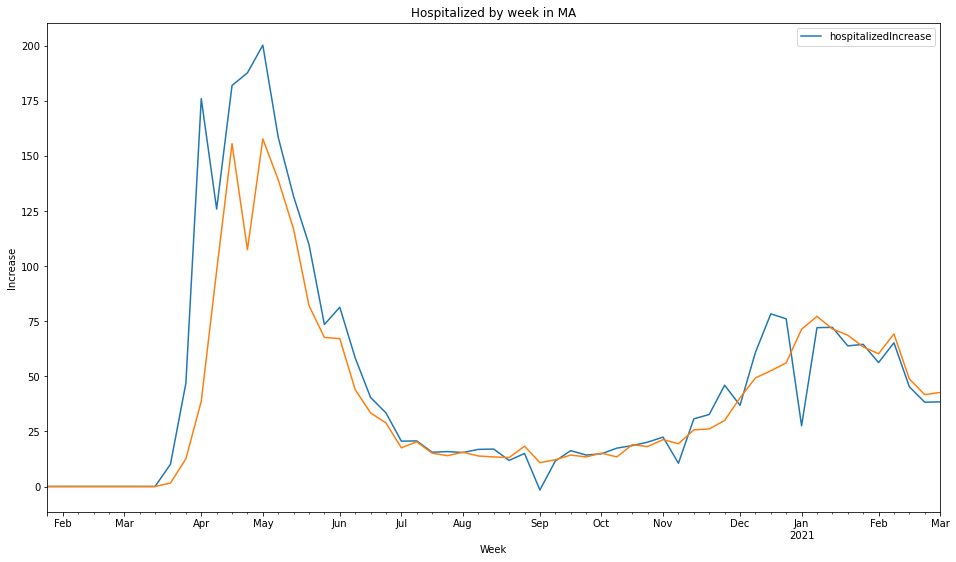

In [65]:
average_covid_hospital = mass_only["hospitalizedIncrease"].resample("W").mean()
average_covid_hospital.head()



ax = average_covid_hospital.plot(legend = True, title='Hospitalized by week in MA')
average_covid_death.plot(ax=ax)
ax.set_xlabel("Week")
ax.set_ylabel("Increase")
plt.show()


**plot the weekly averages of death increases in MA and WA on the same plot**

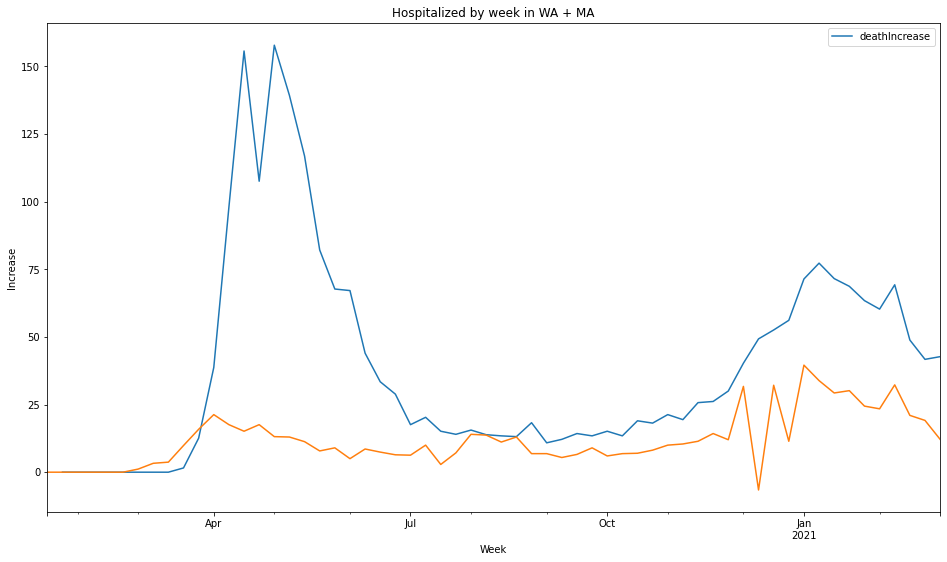

In [68]:
mass_only = covid_df[covid_df.state=="MA"]
was_only = covid_df[covid_df.state=="WA"]
average_covid_death_mass = mass_only["deathIncrease"].resample("W").mean()
average_covid_death_was = was_only["deathIncrease"].resample("W").mean()

ax = average_covid_death_mass.plot(legend = True, title='Hospitalized by week in WA + MA')
average_covid_death_was.plot(ax=ax)
ax.set_xlabel("Week")
ax.set_ylabel("Increase")
plt.show()


**if you finished everything above, plot something interesting**